In [1]:
from pyIClab import (
    Eluent, SwitchingValve, Dummy,
    SampleLoop, ContaminatedPhreeqcSuppressorBeta,
    Detector, IonChromatograph,
    )
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def integrate(time, signal):
    
    time = np.array(time)
    signal = np.array(signal)
    t = np.diff(time)
    signal = 0.5 * (signal[:-1]+signal[1:])
    
    return np.sum(t*signal)

In [3]:
def unit_test(CO2_level, sample):
    
    eluent = Eluent.HydroxideIsocratic('20 mM', name='EG')
    valve = SwitchingValve.SixPort()
    loop = SampleLoop('Loop', V='25 uL')
    column = Dummy.Column()
    suppressor = ContaminatedPhreeqcSuppressorBeta('Suppressor', kind='anion', _CO2_level=CO2_level)
    detector = Detector('Detector', freq='10 Hz')

    valve.assemble(0, eluent)
    valve.assemble(1, column)
    valve.assemble([2, 5], loop)
    column.assemble(suppressor)
    suppressor.assemble(detector)
    ic = IonChromatograph('IC', competing_ions=('OH-',), lockon=valve)
    
    commands = '''
        0 min, sixport, inject
        0.5 min, sixport, load
        '''
    ic.reset_commands(commands)
    ic.set_ModelConstructor('DSM_SE', 'dummy')

    ic.inject(sample, 'loop')
    ic.go(tmax='5 min')
    df = detector.get_signals(signal_type='conductivity')
    
    return df
    

In [4]:
CO2_level = ['0.0', '1e-4', '1e-3', '5e-3', '1e-2', '1.5e-2']
chroms = {}

for l in CO2_level:
    chroms[l] = unit_test(float(l), {'Cl-': '0.1 mM'})
    

12:16:12 Activating <IC System "IC">...
    12:16:12 Configurating model paratemers...
    12:16:12 Building models...
    12:16:13 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1661 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/14944 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/18000 [00:00<?, ?it/s]

12:16:18 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/3000 [00:00<?, ?it/s]

12:16:19 Activating <IC System "IC">...
    12:16:19 Configurating model paratemers...
    12:16:20 Building models...
    12:16:20 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1661 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/14944 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/18000 [00:00<?, ?it/s]

12:16:27 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/3000 [00:00<?, ?it/s]

12:16:28 Activating <IC System "IC">...
    12:16:28 Configurating model paratemers...
    12:16:28 Building models...
    12:16:29 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1661 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/14944 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/18000 [00:00<?, ?it/s]

12:16:35 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/3000 [00:00<?, ?it/s]

12:16:36 Activating <IC System "IC">...
    12:16:36 Configurating model paratemers...
    12:16:37 Building models...
    12:16:37 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1661 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/14944 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/18000 [00:00<?, ?it/s]

12:16:44 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/3000 [00:00<?, ?it/s]

12:16:45 Activating <IC System "IC">...
    12:16:45 Configurating model paratemers...
    12:16:45 Building models...
    12:16:46 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1661 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/14944 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/18000 [00:00<?, ?it/s]

12:16:53 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/3000 [00:00<?, ?it/s]

12:16:54 Activating <IC System "IC">...
    12:16:54 Configurating model paratemers...
    12:16:54 Building models...
    12:16:55 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "Loop" 25 μL>:   0%|          | 0/5000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/1661 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/2000 [00:00<?, ?it/s]

        0.5 min: Execute Command -- <Valve "SixPort"> LOAD


Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/14944 [00:00<?, ?it/s]

Suppressing eluent on <Suppressor "Suppressor">...:   0%|          | 0/18000 [00:00<?, ?it/s]

12:17:02 IC simulation finished...



Calculating eluent conductivity on <Detector "Detector">...:   0%|          | 0/3000 [00:00<?, ?it/s]

In [5]:
peak_areas = {}
backgrounds = {}
for l, chrom in chroms.items():
    df = chrom.copy()
    df['signal'] -= df['signal'][0]
    df = df[(df['time']>=3.5) & (df['time']<=4.5)]
    peak_areas[l] = integrate(df['time'], df['signal'])
    backgrounds[l] = chrom.at[0, 'signal']
    

Text(0, 0.5, 'Peak Area, μS·min/cm')

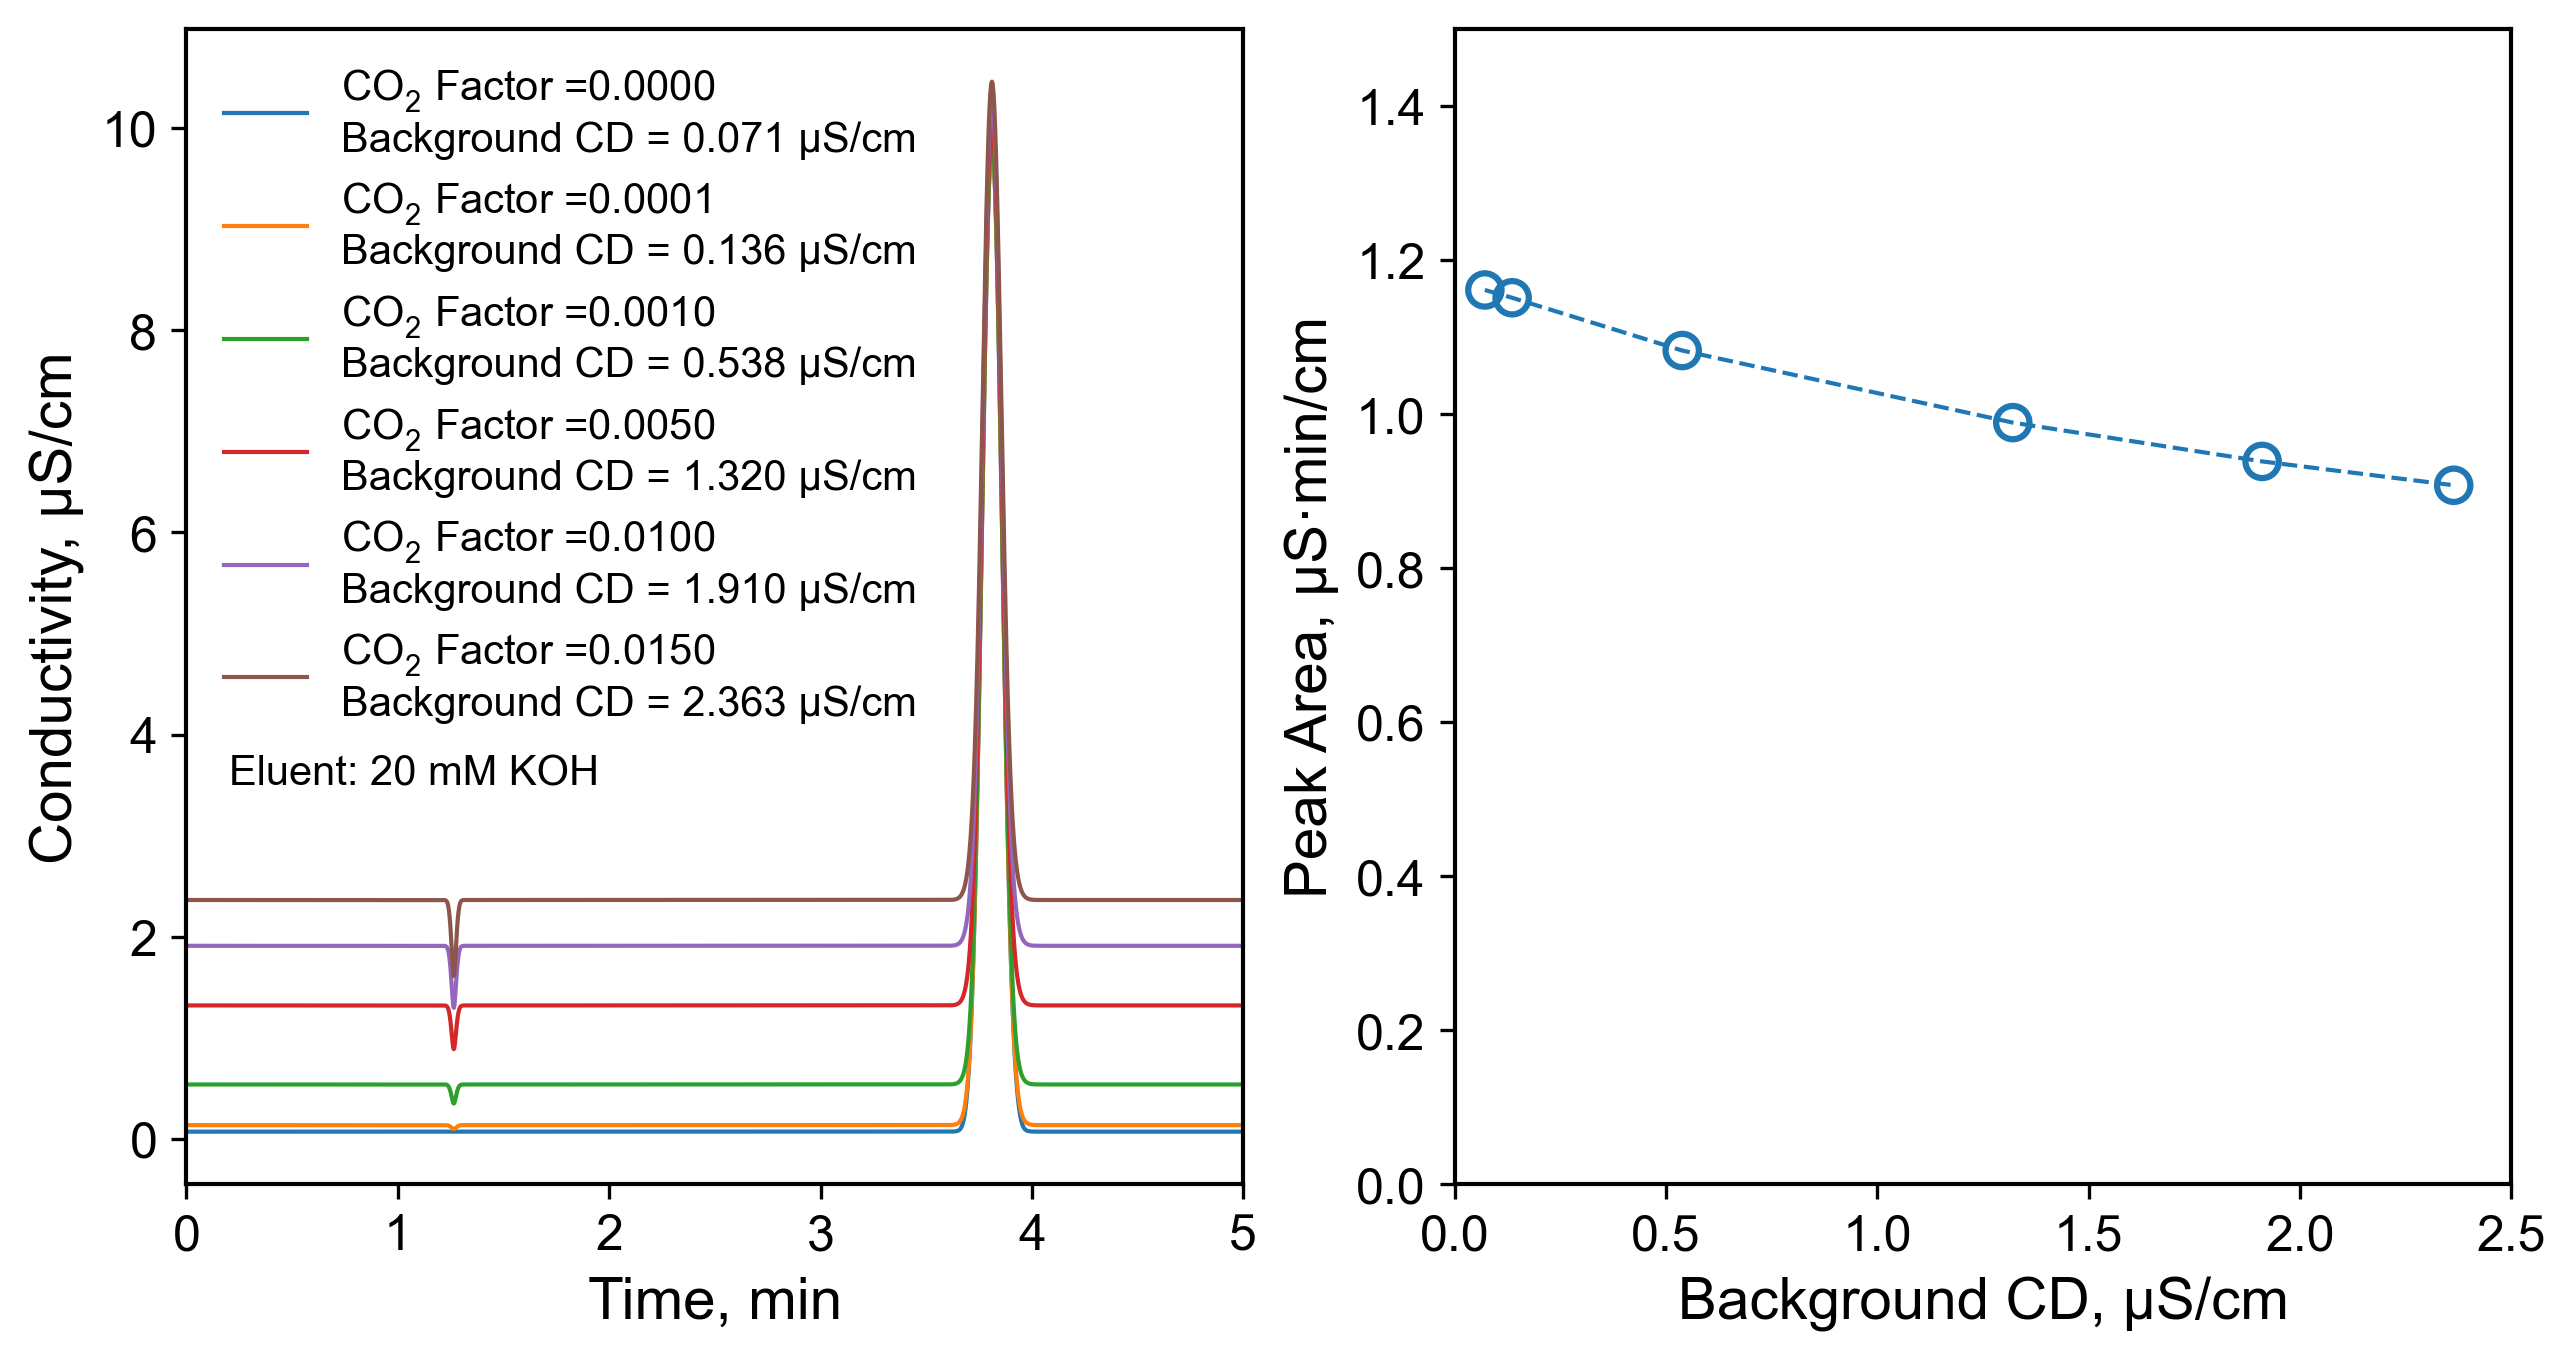

In [6]:
custom_rcconfig = {
    'figure.figsize': [10, 5],
    'figure.dpi': 300.0,
    'axes.linewidth': 1.0,
    'axes.labelsize': 14,
    'font.family': 'Arial',
    'lines.linewidth': 1.0,
    'legend.frameon': False,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'mathtext.default': 'regular',
    'mathtext.fontset': 'dejavusans',
    'text.usetex': False,
    }
plt.rcParams.update(custom_rcconfig)
fig, (ax0, ax1) = plt.subplots(1, 2)

for l, chrom in chroms.items():
    ax0.plot('time', 'signal',
        data=chrom,
        label='CO$_{2}$ Factor =' + f'{float(l):.4f}\nBackground CD = {backgrounds[l]:.3f} μS/cm'
        )
ax0.text(.2, 3.5, 'Eluent: 20 mM KOH')
ax0.legend()
ax0.set(xlim=(0, 5))
ax0.set_xlabel('Time, min')
ax0.set_ylabel('Conductivity, μS/cm')

scatters = ax1.scatter(backgrounds.values(), peak_areas.values(), s=64,
    )
blue = scatters.get_facecolor()
scatters.set(facecolor='none', edgecolor=blue, linewidth=1.5)
ax1.plot(backgrounds.values(), peak_areas.values(), linestyle='--',
    )
ax1.set(ylim=(0, 1.5), xlim=(0, 2.5))
ax1.set_xlabel('Background CD, μS/cm')
ax1.set_ylabel('Peak Area, μS·min/cm')
